## Image Processing with Keras in Python

**Course Structure:**
* Chapter 1. Image Processing with Neural Networks
* Chapter 2. Using Convolutions
* Chapter 3. Going Deeper
* Chapter 4. Understanding and Improving Deep Convolutional Networks

### CHAPTER 1. Image Processing with Neural Networks

#### Part 1.1 Introducing convolutional neural networks (CNNs)

* CNNs are powerful algorithms for processing images
* Pre-requisites for this course:
    1. Deep Learning course 
    2. Machine Learning:
       * Over-fitting
       * Model evaluation
       * Cross-validation

* Images are data to computers as an array of numbers
* Color images have 3 dimensions: width, height, color channels (rgb)

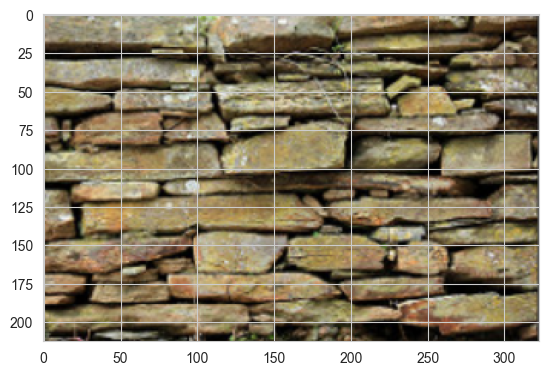

In [56]:
import json

# Code for part 1.1

# images as data: visualizations
import matplotlib.pyplot as plt

# load the image
data = plt.imread('19_datasets/bricks.png')
plt.imshow(data)
plt.show()


(213, 323, 4)


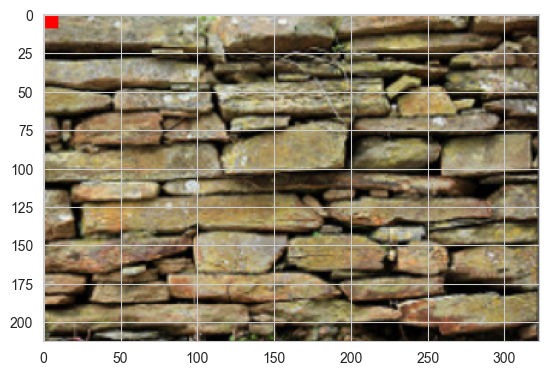

In [57]:
# Code for part 1.1 (continue)

# images as data: changing images

print(data.shape)
# set the red channel to 1, other channels to 0
data[:10, :10, 0] = 1
data[:10, :10, 1] = 0
data[:10, :10, 2] = 0
plt.imshow(data)
plt.show()

#### Part 1.2 Classifying images

* Images of three classes: dresses, t-shirts and shoes
* Build an algorithm to distinguish between these classes
* Training: provide samples from these three classes, along with class labels
* Evaluating: testing it on a portion of data that has been set aside in advance to avoid over-fitting
* Representing class data: one-hot encoding

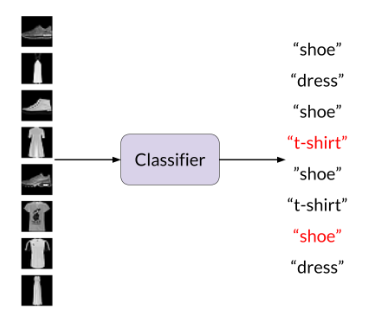

In [58]:
# display image classification
from IPython import display

display.Image("Images/19_image_classification.png")

In [59]:
# Code for part 1.2

# using one-hot encoding to represent images
import numpy as np

# get labels
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# set categories array
n_categories = 3
categories = np.array(['shirt', 'dress', 'shoe'])

# initialize ohe_labels
ohe_labels = np.zeros((len(labels), n_categories))

# loop over labels
for ii in range(len(labels)):
    jj = np.where(categories == labels[ii])
    ohe_labels[ii, jj] = 1

In [60]:
# Code for part 1.2 (continue)

# evaluating a classifier
import numpy as np

# get pretended test_labels and predictions
test_labels = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 1., 0.]])

predictions = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [1., 0., 0.],
                        [0., 0., 1.],
                        [1., 0., 0.],
                        [0., 0., 1.],
                        [0., 1., 0.]])

# calculate the number and proportion of correct predictions
number_correct = (test_labels * predictions).sum()
proportion_correct = (test_labels * predictions).sum() / len(test_labels)
print('Number of correct predictions: ', number_correct)
print('Proportion of correct predictions: ', proportion_correct)


Number of correct predictions:  6.0
Proportion of correct predictions:  0.75


#### Part 1.3 Classification with Keras

* Start with the most simple network: fully connected network
* Steps:
    1. Build network/ model (Sequential, Dense)
    2. Compile the model
    3. Reshape data: **samples** to be rows in an array, columns to represent **pixels** in image
    4. Fit/train the model with 'validation_split' 
    5. Evaluate the model on a separate test data set

In [61]:
# get variables needed in the exercise

# import ast
# import re
import numpy as np

# method 1:
# read string data
train_data_file_path = '19_datasets/train_data.txt'
test_data_file_path = '19_datasets/test_data.txt'
train_labels_file_path = '19_datasets/train_labels.txt'
test_labels_file_path = '19_datasets/test_labels.txt'

# create empty lists
train_data = []
train_labels = []
test_data = []
test_labels = []

with open(train_data_file_path, 'r') as file1:
    for line in file1:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        train_data.append(cleaned_line)
train_data = np.loadtxt(train_data)
train_data = train_data.reshape(50, 28, 28, 1)

with open(test_data_file_path, 'r') as file3:
    for line in file3:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        test_data.append(cleaned_line)
test_data = np.loadtxt(test_data)
test_data = test_data.reshape(10, 28, 28, 1)

with open(train_labels_file_path, 'r') as file2:
    for line in file2:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        train_labels.append(cleaned_line)
train_labels = np.loadtxt(train_labels)
train_labels = train_labels.reshape(50, 3)

with open(test_labels_file_path, 'r') as file2:
    for line in file2:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        test_labels.append(cleaned_line)
test_labels = np.loadtxt(test_labels)
test_labels = test_labels.reshape(10, 3)
       

In [62]:
# Code for part 1.3 

# build a neural network for classification
from keras.models import Sequential
from keras.layers import Dense

# build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# reshape training data
train_data = train_data.reshape(50, 784)

# fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

# reshape test data
test_data = test_data.reshape(10, 784)

# evaluate the model
model.evaluate(test_data, test_labels)

# it returns loss and accuracy in the list 

Epoch 1/3
2/2 [==============================] - 1s 139ms/step - loss: 1.0617 - accuracy: 0.3750 - val_loss: 0.9564 - val_accuracy: 0.7000
Epoch 2/3
2/2 [==============================] - 0s 25ms/step - loss: 0.9767 - accuracy: 0.4250 - val_loss: 0.9139 - val_accuracy: 0.6000
Epoch 3/3
1/1 [==============================] - 0s 20ms/step - loss: 0.9877 - accuracy: 0.5000


[0.9876660108566284, 0.5]

### CHAPTER 2. Using Convolutions

#### Part 2.1 Convolutions

**Correlations in images:**
* Natural images contain spatial correlations
* Examples: pixels along a contour or edge
* How to use these correlations?
**Convolution!**
* Convolution is a kernel sliding along the values
* In each location, we select a window that is the size of the kernel
* Multiply the window with kernel, then sum it up
* The final value indicates changes from smaller (DARK) value to bigger (BRIGHT) value or reverse         

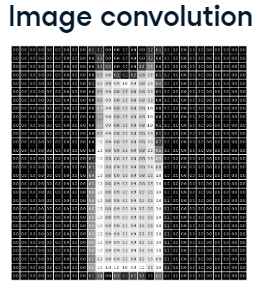

In [64]:
# display convolution
from IPython import display
display.Image("Images/19_convolution.png")

In [65]:
# Code for part 2.1

# one dimensional convolutions

# define array, kernel, and list to store convolution values
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# calculate the output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()
print(conv)


[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [67]:
# get the variable for exercise

import numpy as np

# read the text file that stores the variable
im_file_path = '19_datasets/im.txt'

# extract number and reshape it to a numpy array of shape (159, 240)
im = []
with open(im_file_path, 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        im.append(cleaned_line)
im = np.loadtxt(im)
im = im.reshape(159, 240)       

In [68]:
# Code for part 2.1 (continue)

# image convolutions

# define kernel and result list
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# calculate the output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Code for part 2.1 (continue)

# defining image convolution kernels

# 1) horizontal line kernel
kernel_1 = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]])

# 2) light spot surrounded by dark pixels
kernel_2 = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

# 3) dark spot surrounded by bright pixels
kernel_3 = np.array([[1, 1, 1],
                   [1, -1, 1],
                   [1, 1, 1]])

#### Part 2.2 Implementing image convolutions in Keras

* 